In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv("Multiclass classification Mobile price.csv")

print("Dataset preview:")
print(df.head())

Dataset preview:
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_scr

In [4]:
target = "price_range"

X = df.drop(target, axis=1)
y = df[target]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [6]:
dt = DecisionTreeClassifier(
    criterion="entropy",    
    max_depth=4,          
    random_state=42
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [7]:
y_pred = dt.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7975

Confusion Matrix:
 [[89 11  0  0]
 [ 8 75 17  0]
 [ 0 22 66 12]
 [ 0  0 11 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       100
           1       0.69      0.75      0.72       100
           2       0.70      0.66      0.68       100
           3       0.88      0.89      0.89       100

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



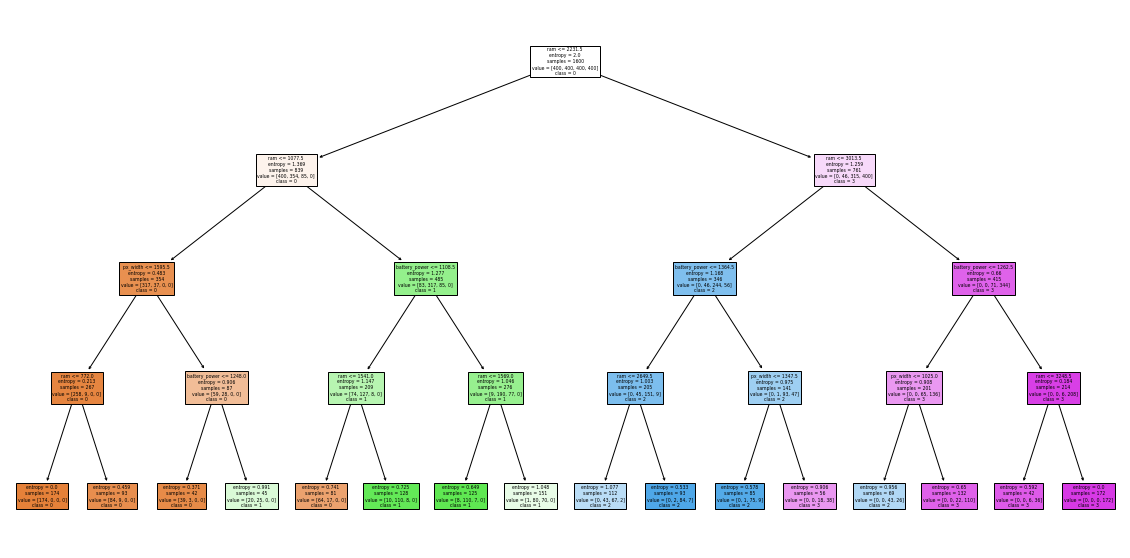

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=["0","1","2","3"], filled=True)
plt.show()